# DBSCAN Clustering for Identifying Outliers Using Python - Tutorial 22 in Jupyter Notebook

**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.[1] It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.[2]

In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, KDD.[3]

Source: https://en.wikipedia.org/wiki/DBSCAN

## DBSCAN Clustering to Identify Outliers

In [3]:
import numpy as mp
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from sklearn.cluster import DBSCAN
from collections import Counter

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 12
sb.set_style('whitegrid')

In [10]:
df = pd.read_csv('data/iris.data.csv')
column_names = ['Sepal Length', 'Speal Width', 'Petal Lenght', 'Pethal Width', 'Species']
df.columns= column_names
data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values

df.head()

,Sepal Length,Speal Width,Petal Lenght,Pethal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


### DBSCAN clustering to identify outliers

#### Train your model and identify outliers

In [12]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)

### Visualize your results

In [21]:
outliers_df = pd.DataFrame(data)
outliers_df.columns= column_names[:-1]
Counter(model.labels_)

Counter({0: 49, 1: 94, -1: 6})

In [46]:
outliers_df[model.labels_==-1]

,Sepal Length,Speal Width,Petal Lenght,Pethal Width
97,5.1,2.5,3.0,1.1
104,7.6,3.0,6.6,2.1
116,7.7,3.8,6.7,2.2
117,7.7,2.6,6.9,2.3
121,7.7,2.8,6.7,2.0
130,7.9,3.8,6.4,2.0


In [48]:
outliers_df[model.labels_==1]

,Sepal Length,Speal Width,Petal Lenght,Pethal Width
49,7.0,3.2,4.7,1.4
50,6.4,3.2,4.5,1.5
51,6.9,3.1,4.9,1.5
52,5.5,2.3,4.0,1.3
53,6.5,2.8,4.6,1.5
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [50]:
outliers_df[model.labels_==0]

,Sepal Length,Speal Width,Petal Lenght,Pethal Width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
5,4.6,3.4,1.4,0.3
6,5.0,3.4,1.5,0.2
7,4.4,2.9,1.4,0.2
8,4.9,3.1,1.5,0.1
9,5.4,3.7,1.5,0.2


In [51]:
outliers_df[model.labels_==2]

,Sepal Length,Speal Width,Petal Lenght,Pethal Width


Text(0.5, 1.0, 'DBSCAN for outlier Detection')

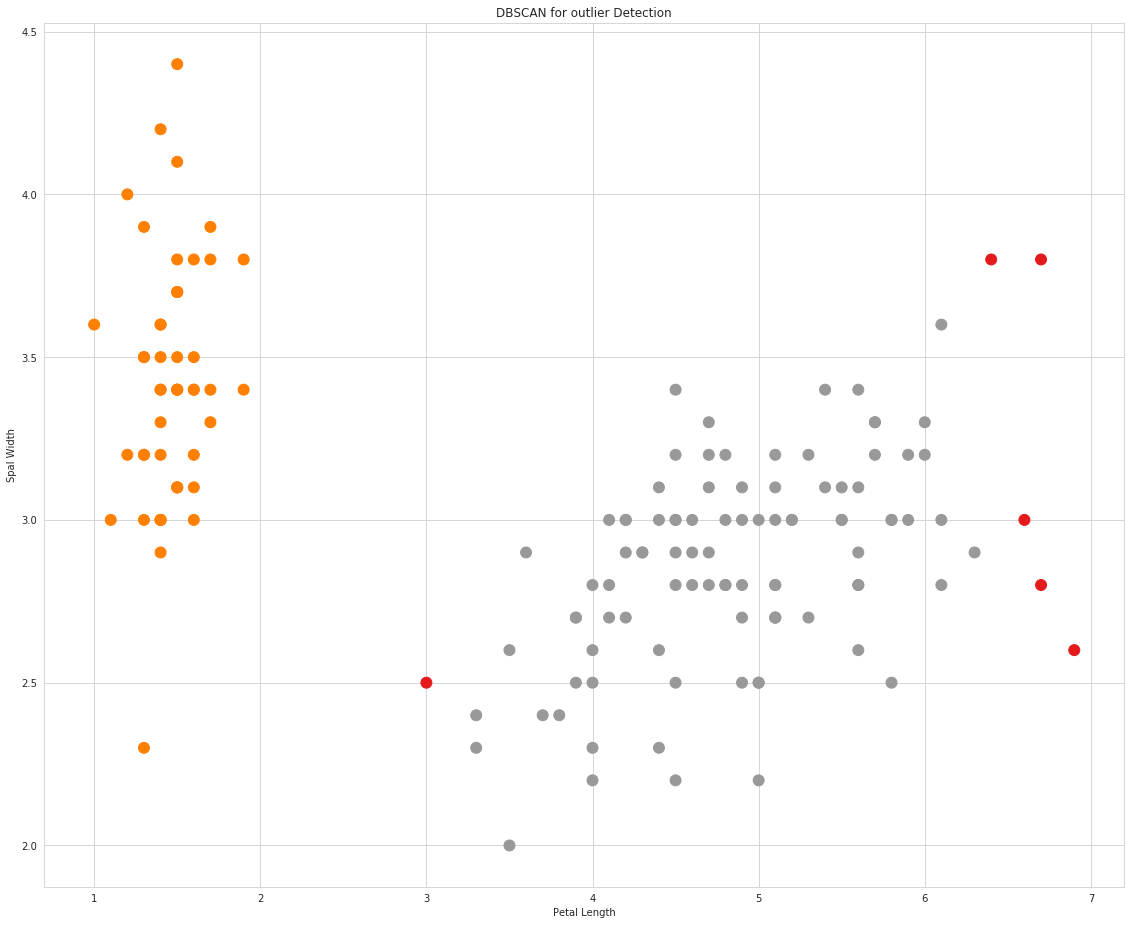

In [71]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 1, 1])
colors = model.labels_
ax.scatter(data[:,2], data[:, 1], c=colors, s=120, cmap='Set1')

ax.set_xlabel('Petal Length')
ax.set_ylabel('Spal Width')

plt.title('DBSCAN for outlier Detection')

In [45]:
data

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3